# **MLPP23 // Assignment 2**

assigned : **Feb 20, 2023**

DUE : **Feb 26, 2023 11:59pm**

## **Sea level rise: projections for the future**

<img src="https://cdn.viewing.nyc/assets/media/5c0dcd07e43c85f0ad421ed09f21df33/elements/08ebcd75071c8e4d673147698fbbdcdd/xl/cce6b621-11a3-4f0d-8a53-fccdb6457875_2x.png" width=500>

---

### OVERVIEW

Sea level has been on the rise for at least 100 years, and as the climate changes and the Earth warms, the rate of that rise has been an active area of study given the potential consequences if sea level is strongly affected.

Measurements of sea level mostly come in two flavors, satellites and tide gauges.  The satellite measurements are primarily accomplished by firing radio waves towards the ocean surface and waiting for the time it takes for those radio waves to bounce back and return to the satellite.  Since we know how fast light (radio waves are a form of light) travels, the distance from the satellite to the surface is just the bounce back time divided by the speed of light.  [TOPEX/Poseidon](https://en.wikipedia.org/wiki/TOPEX/Poseidon) has been one of the most successful satellite missions for these altimetry measurements of the ocean surface.  [Tide gauges](https://en.wikipedia.org/wiki/Tide_gauge), on the other hand, are ground-based measurements that directly measure the height of water relative to a stationary device.  They are less accurate, provide significantly reduced spatial coverage, but prior to satellite altimetry, were the only real method for measuring sea level.

There are three main goals of this assignment:

1. you will apply linear regression models to satellite data using Stochastic Gradient Descent;
2. you will evaluate the goodness-of-fit of these models;
3. you will compare linear models using data covering different time scales and make projections for future sea levels.

<b>

Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.


2. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

3. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

Worked with Nagamalla Charitha for second half of the assignment.

---

### **PART 1 - Background**

Good data science and machine learning (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>
<u>In your own words</u>, provide a brief (no more than 500 words) descriptive overview of sea level rise, including its historical significance, context within a changing climate, and projections for the future.  Potential topics to consider and address include:

1. description of historical sea level measurements
  
2. what open satellite data exist and where they can be located

3. characteristic numbers for sea level measurements over time

4. why sea level might change as the climate changes

5. what projections exist for the future of sea level rise

6. on what those projections depend and the consequences for various scenarios

Please include *references* within the description via weblinks (like the TOPEX/Poseidon link in the Overview in the cell above).
</b>

1.Sea level measurements have been recorded right from the early 1700s. The earliest measurements were typically taken with simple tide gauges. In the 19th century, more sophisticated tide gauges were developed, which used  a mercury column to measure the height of the water.In the early 20th century, new technologies, such as acoustic or radar-based sensors, were developed which allowed for real-time monitoring of sea level and the development of global sea level monitoring networks. Today, sea level is measured using a variety of methods, including satellite altimetry, tide gauges, and ocean-bottom pressure sensors. Satellites are useful for measuring sea level over large areas, while tide gauges provide more detailed measurements at specific locations. [History](https://www.e-education.psu.edu/earth103/node/731)


2.There are several open satellite data sources available for sea level measurement.

TOPEX/Poseidon was a joint satellite altimeter mission between NASA, ; and CNES, to map ocean surface topography. [TOPEX](https://en.wikipedia.org/wiki/TOPEX/Poseidon)
Jason-3: Jason-3 is a satellite mission that provides global sea level measurements. [Jason-3](https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/). European Space Agency's Sentinel-3: Sentinel-3 is a satellite mission that provides global sea level measurements. (https://scihub.copernicus.eu/).

3.Global sea level rose by about 120 m during the several millennia that followed the end of the last ice age (approximately 21,000 years ago), and stabilised between 3,000 and 2,000 years ago. Sea level indicators suggest that global sea level did not change significantly from then until the late 19th century. Estimates for the 20th century show that global average sea level rose at a rate of about 1.7 mm yr–1.ea level rise is not uniform across the globe.
The global mean sea level has risen by an average of about 1.8 mm per year over the period from 1961 to 2018, according to the Intergovernmental Panel on Climate Change [IPCC](https://archive.ipcc.ch/publications_and_data/ar4/wg1/en/faq-5-1.html#:~:text=Global%20sea%20level%20is%20projected,about%204%20mm%20yr%E2%80%931.)

4.Climate change, which is caused by human activities such as the burning of fossil fuels, deforestation, and agriculture is one of the major reason of change in sea level. The resulting increase in greenhouse gas concentrations in the atmosphere has led to a warming of the Earth's surface, which in turn affects the oceans and ice sheets. [Climate change](https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level)

5.current scientific projections indicate that sea level is likely to continue to rise throughout the 21st century and beyond, with potentially significant impacts on coastal communities and ecosystems.NOAA projects that global mean sea level could rise by as much as 2.5 meters by the year 2100 under a high emissions scenario. [Rise](https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level)

6.The projections are dependent on multiple criteria. The major being high emissions scenario, rate of human activities which will indirectly affect sea levels. Same as above references.













### **PART 2 - Loading the data**

In this assignment, we will be using several different data sets from the National Oceanic and Atmospheric Administration (NOAA).  In particular, we'll be looking at data from TOPEX as well as its follow on missions Jason-1, Jason-2, and Jason-3.  All of the data that you will be using is available [here](https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/LSA_SLR_timeseries.php).



<b>At the website in the previous cell, copy the link address of the global mean sea level csv file with seasonal signals removed from the "TOPEX, Jason-1, Jason-2, and Jason-3" column.  Load the data from the above URL directly (i.e., do not download the data and then reupload to Google Drive) using pandas `read_csv()` function into a DataFrame named `noaa`.  Note, you'll have to skip the first 5 rows.</b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fname="https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_txj1j2_90.csv"
noaa = pd.read_csv(fname, skiprows=5)

In [ ]:
noaa.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3
0,1992.9614,-19.24,NaN,NaN,NaN
1,1992.9865,-19.65,NaN,NaN,NaN
2,1993.0123,-15.32,NaN,NaN,NaN
3,1993.0407,-19.12,NaN,NaN,NaN
4,1993.0660,-23.64,NaN,NaN,NaN


### **PART 3 - Aggregating and plotting the data**

Notice that there are many NaN values (for a variety of reasons, but one big one is that the satellites were not all operating simultaneously).  Let's aggregate the data from all of the satellites so that we have one height for each timestamp.

<b>Take the maximum value across the four satellite columns and store it as another column within the DataFrame called `"max_level"`.</b>

In [ ]:
# -- define subset of the data
cols = noaa.columns[1:5] #dosen't take the 5th column name
noaa_sub = noaa[cols]

In [ ]:
noaa["max_level"]=noaa_sub.max(axis=1)

In [ ]:
noaa.head(5)

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level
0,1992.9614,-19.24,NaN,NaN,NaN,-19.24
1,1992.9865,-19.65,NaN,NaN,NaN,-19.65
2,1993.0123,-15.32,NaN,NaN,NaN,-15.32
3,1993.0407,-19.12,NaN,NaN,NaN,-19.12
4,1993.0660,-23.64,NaN,NaN,NaN,-23.64


<b>Plot this maximum sea level as a function of year using a black line of linewidth 0.5.$^{\dagger}$  Remember to ALWAYS label your axes, including units in square brackets when necessary.</b>

<small>$^{\dagger}$ you can use `noaa.plot?` to see the keywords associated with the plot function; there are <u>many</u> ways to customize plots.</small>

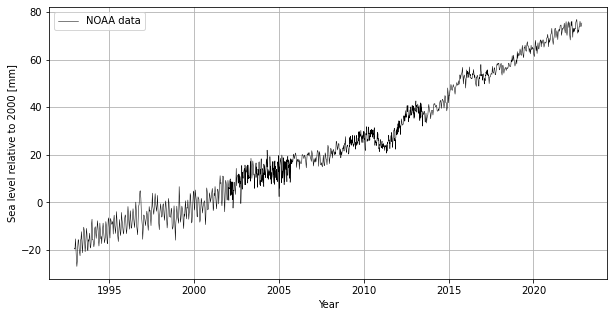

In [ ]:
ax = noaa.plot("year", "max_level",linewidth=0.5,color="black",figsize=(10, 5), grid=True, xlabel="Year",
          ylabel="Sea level relative to 2000 [mm]",label="NOAA data")


Let's compare this global value to values at smaller spatial scales.

<b>In the same way that you loaded the global data with seasonal effects removed, load in data for the Pacific Ocean, the Atlantic Ocean, the Indian Ocean, and the Southern Ocean (each in its own DataFrame), and for each of these new DataFrames, create a `"max_level"` column that is the max sea level for that region .</b>

In [ ]:
pac_fname="https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_pac_free_txj1j2_90.csv"
atl_fname="https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_atl_free_txj1j2_90.csv"
ind_fname="https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_ind_free_txj1j2_90.csv"
so_fname="https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_so_free_txj1j2.csv"

In [ ]:
pac = pd.read_csv(pac_fname,skiprows=5)
pac_sub = pac[cols]
pac["max_level"]=pac_sub.max(axis=1)
pac.head(5)

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level
0,1992.9614,-13.01,NaN,NaN,NaN,-13.01
1,1992.9864,-24.28,NaN,NaN,NaN,-24.28
2,1993.0122,-20.58,NaN,NaN,NaN,-20.58
3,1993.0405,-28.93,NaN,NaN,NaN,-28.93
4,1993.0659,-29.39,NaN,NaN,NaN,-29.39


In [ ]:
atl = pd.read_csv(atl_fname,skiprows=5)
atl_sub = atl[cols]
atl["max_level"]=atl_sub.max(axis=1)
atl.head(5)

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level
0,1992.9615,-24.88,NaN,NaN,NaN,-24.88
1,1992.9870,-17.20,NaN,NaN,NaN,-17.20
2,1993.0128,-16.66,NaN,NaN,NaN,-16.66
3,1993.0413,-11.66,NaN,NaN,NaN,-11.66
4,1993.0663,-18.86,NaN,NaN,NaN,-18.86


In [ ]:
ind = pd.read_csv(ind_fname,skiprows=5)
ind_sub = ind[cols]
ind["max_level"]=ind_sub.max(axis=1)
ind.head(5)

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level
0,1992.9614,-28.52,NaN,NaN,NaN,-28.52
1,1992.9865,-12.33,NaN,NaN,NaN,-12.33
2,1993.0121,2.22,NaN,NaN,NaN,2.22
3,1993.0405,-3.17,NaN,NaN,NaN,-3.17
4,1993.0659,-14.62,NaN,NaN,NaN,-14.62


In [ ]:
so = pd.read_csv(so_fname,skiprows=5)
so_sub = so[cols]
so["max_level"]=so_sub.max(axis=1)
so.head(5)

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level
0,1992.9612,-24.13,NaN,NaN,NaN,-24.13
1,1992.9865,-19.85,NaN,NaN,NaN,-19.85
2,1993.0122,-11.83,NaN,NaN,NaN,-11.83
3,1993.0406,-20.97,NaN,NaN,NaN,-20.97
4,1993.0659,-27.02,NaN,NaN,NaN,-27.02


<b>Plot all of the max sea level data in a different color on the same plot using linewidth 0.2.  Plot the global line last in black using a linewidth of 0.5.  Be sure to include a legend in the plot.</b>

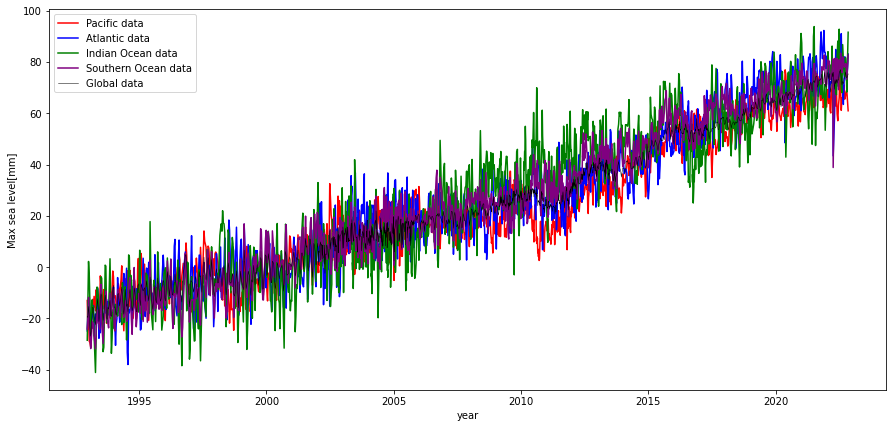

In [ ]:
ax = pac.plot("year", "max_level", label="Pacific data", color="red", xlabel="Year", ylabel="Max sea level[mm]",figsize=(15,7))
ax=  atl.plot("year", "max_level", label="Atlantic data",  ax=ax, color="blue")
ax= ind.plot("year", "max_level", label="Indian Ocean data",  ax=ax, color="green")
ax=so.plot("year", "max_level", label="Southern Ocean data",  ax=ax, color="purple")
ax = noaa.plot("year", "max_level", linewidth=0.5, label="Global data",color="black",ax=ax)

<b>Describe the plot above.  What can you conclude about the variability of sea level rise across the globe?</b>

The plot above indicates there is a increase in sea level rise across globes.

This data covers roughly 30 years of sea level changes, but there are data that go back further that are available from CSIRO (Commonwealth Scientific and Industrial Research Organization).  Descriptions of aggregated historical data from CSIRO can be found [here](https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/) and in the associated links.  The data we'll be using is available as a [CSV](https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv) -- but please see the documentation and caveats associated with it in the README at the bottom of [this](https://datahub.io/core/sea-level-rise) page.

<b>Read in the CSIRO data from the link above labeled CSV (again, <u>without</u> downloading the data) into a DataFrame called `csiro` and take the <u>minimum</u> of the `"CSIRO Adjusted Sea Level"` and `"NOAA Adjusted Sea Level"` colmuns for each year and add those values to the `csiro` DataFrame as a column called `"min_level"`.</b>

In [ ]:
csiro_fname= "https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv"
csiro=pd.read_csv(csiro_fname)
csiro.head(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN
4,1884-03-15,0.590551,-0.283465,1.464567,NaN


In [ ]:
cols_1=["CSIRO Adjusted Sea Level","NOAA Adjusted Sea Level"]
sub_1=csiro[cols_1]
csiro["min_level"]=sub_1.min(axis=1)
csiro.head(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-0.232283
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,0.590551


Note that the year 2000 is in the 120th element of the CSIRO data and that the data is in inches, not millimeters.

<b>To get it in the same units as the NOAA data above, subtract off the value of `min_level` at the 120th element from `min_level`, then multiply the result by `2.54 * 10` (the inches to millimeters conversion), and put the result into a new column called `"adjusted_min_level"`.</b>

In [ ]:
csiro["adjusted_min_level"]=(csiro["min_level"]-csiro.iloc[120,4])*2.54*10

Run the cell below to create a column called "year_int" that is the CSIRO year so that we don't have to worry about the months and dates from now on.

In [ ]:
csiro["year_int"] = [int(i[:4]) for i in csiro["Year"]]

In [ ]:
csiro.head(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level,year_int
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000,-175.782783,1880
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472,-170.182783,1881
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945,-186.982783,1882
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.682783,1883
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,0.590551,-160.782783,1884


<b>Now plot all of the data (all NOAA and CSIRO) on the same graph.</b>

<AxesSubplot:xlabel='year_int', ylabel='Sea level [mm]'>

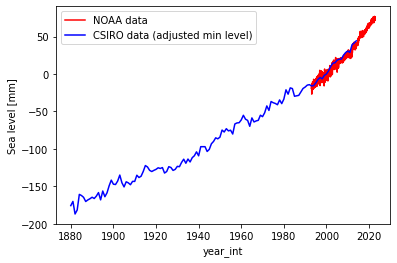

In [ ]:
ax = noaa.plot("year", "max_level", label="NOAA data", color="red", xlabel="Year", ylabel="Sea level [mm]")
csiro.plot("year_int", "adjusted_min_level", label="CSIRO data (adjusted min level)",  ax=ax, color="blue")

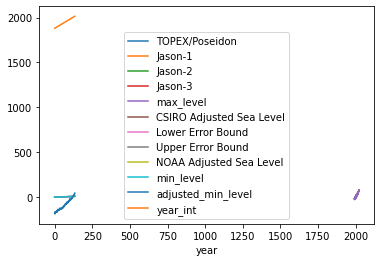

In [ ]:
ax=noaa.plot(x="year")
ax=csiro.plot(ax=ax)

### **PART 4 - Standardize the data**

You should now have two DataFrames, one holding the <u>global</u> NOAA data (we'll work with only the global data from now on) with columns called `"year"` and `"max_level"`, and one holding the CSIRO data with columns called `"year_int"` and `"adjusted_min_level"`.  As we did in class, we have to standardize this data for the SGD-based linear regression.

<b>Get the mean and standard deviation of `"year"` and `"max_level"` from the NOAA dataframe and the mean and standard deviation of the `"year_int"` and `"adjusted_min_level"` from the CSIRO dataframe.</b>

In [ ]:
#NOAA data
print(noaa["year"].mean())  #year mean
print(noaa["year"].std()) #year stdev
print(noaa["max_level"].mean()) #max level mean
print(noaa["max_level"].std()) #max level stdev

2008.4829838257015
7.883028559157361
25.395450516986703
24.52842955528888


In [ ]:
print( csiro["year_int"].mean())
print(csiro["year_int"].std())
print(csiro["adjusted_min_level"].mean())
print(csiro["adjusted_min_level"].std())

1947.0
39.11521443121589
-83.3455077780252
61.66319754974889


<b>Create columns in your NOAA dataframe called `"year_st"` and `"max_level_st"` that are standardized versions of `"year"` and `"max_level"`.</b>

In [ ]:
noaa["year_st"] = (noaa["year"] - noaa["year"].mean()) / noaa["year"].std()
noaa["max_level_st"] = (noaa["max_level"] - noaa["max_level"].mean()) / noaa["max_level"].std()

In [ ]:
noaa.head(5)

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level,year_st,max_level_st
0,1992.9614,-19.24,NaN,NaN,NaN,-19.24,-1.968987,-1.819744
1,1992.9865,-19.65,NaN,NaN,NaN,-19.65,-1.965803,-1.836459
2,1993.0123,-15.32,NaN,NaN,NaN,-15.32,-1.962530,-1.659929
3,1993.0407,-19.12,NaN,NaN,NaN,-19.12,-1.958928,-1.814851
4,1993.0660,-23.64,NaN,NaN,NaN,-23.64,-1.955718,-1.999127


 <b>Create columns in your CSIRO dataframe called `"year_int_st"` and `"adjusted_min_level_st"` that are standardized versions of `"year_int"` and `"adjusted_min_level"`.</b>

In [ ]:
csiro["year_int_st"] = (csiro["year_int"] - csiro["year_int"].mean()) / csiro["year_int"].std()
csiro["adjusted_min_level_st"] = (csiro["adjusted_min_level"] - csiro["adjusted_min_level"].mean()) / csiro["adjusted_min_level"].std()

In [ ]:
csiro.head(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level,year_int,year_int_st,adjusted_min_level_st
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000,-175.782783,1880,-1.712888,-1.499067
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472,-170.182783,1881,-1.687323,-1.408251
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945,-186.982783,1882,-1.661757,-1.680699
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.682783,1883,-1.636192,-1.594748
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,0.590551,-160.782783,1884,-1.610626,-1.255810


<b>Make a plot of the standardized NOAA global data.</b>

<AxesSubplot:xlabel='Year [standardized]', ylabel='Max Sea level [standardized]'>

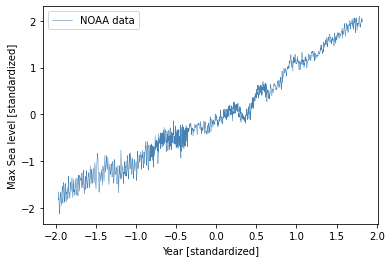

In [ ]:
noaa.plot("year_st", "max_level_st", kind="line", linewidth=0.5,
                xlabel="Year [standardized]",
                ylabel="Max Sea level [standardized]",
                color="steelblue", label="NOAA data")

<b>Make a plot of the standardized CSIRO data.</b>

<AxesSubplot:xlabel='Year [standardized]', ylabel='Min Sea level [standardized]'>

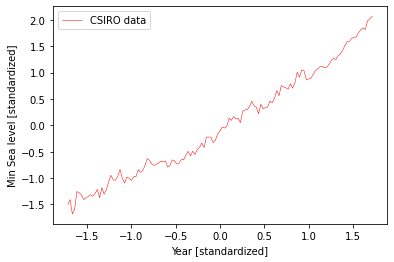

In [ ]:
csiro.plot("year_int_st", "adjusted_min_level_st", kind="line", linewidth=0.5,
                xlabel="Year [standardized]",
                ylabel="Min Sea level [standardized]",
                color="Red", label="CSIRO data")

### **PART 5 - Fit and compare models between NOAA and CSIRO**

<b>Import `SGDRegressor` from `sklearn` and run a regression model on the NOAA global data using the default parameters.</b>

In [ ]:
from sklearn.linear_model import SGDRegressor
noaa_lm = SGDRegressor()
noaa_lm.fit(noaa[["year_st"]], noaa["max_level_st"])

SGDRegressor()

In [ ]:
noaa_model= noaa_lm.predict(noaa[["year_st"]])
noaa["model_st"]= noaa_model

<b>"Unstandardize" the model as we did in class by multiplying by the standard deviation and adding the average of the unstandardized data set.</b>

In [ ]:
noaa_model_unst = noaa["model_st"] * noaa["max_level"].std() + noaa["max_level"].mean()
noaa["model_unst"]=noaa_model_unst

In [ ]:
noaa.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level,year_st,max_level_st,model_st,model_unst
0,1992.9614,-19.24,NaN,NaN,NaN,-19.24,-1.968987,-1.819744,-1.934309,-22.050100
1,1992.9865,-19.65,NaN,NaN,NaN,-19.65,-1.965803,-1.836459,-1.931182,-21.973405
2,1993.0123,-15.32,NaN,NaN,NaN,-15.32,-1.962530,-1.659929,-1.927968,-21.894571
3,1993.0407,-19.12,NaN,NaN,NaN,-19.12,-1.958928,-1.814851,-1.924430,-21.807792
4,1993.0660,-23.64,NaN,NaN,NaN,-23.64,-1.955718,-1.999127,-1.921278,-21.730486


<b>Calculate the Mean Squared Error (MSE) and $R^2$ for this model.</b>

In [ ]:
mse = np.mean((noaa["max_level"] - noaa["model_unst"])**2)
print("MSE = {0:0.4}".format(mse))

r2 = 1 - np.var(noaa["max_level"] - noaa["model_unst"]) / np.var(noaa["max_level"])
print("R^2 = {0:0.2}".format(r2))

MSE = 21.89
R^2 = 0.96


<b>Overplot this model on the global data.</b>

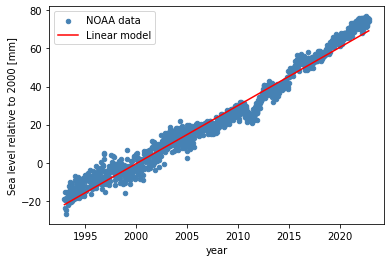

In [ ]:
ax = noaa.plot("year", "max_level", kind="scatter",
                xlabel="Year",
                ylabel="Sea level relative to 2000 [mm]",
                color="steelblue", label="NOAA data", s=20)
ax = noaa.plot("year", "model_unst", label="Linear model", color="red", ax=ax)

<b>Fit an SGDRegressor model to the standardized CSIRO data, "un-standardize" the model, and calculate the MSE and $R^2$ for this model.</b>

In [ ]:
from sklearn.linear_model import SGDRegressor

csiro_lm = SGDRegressor()
csiro_lm.fit(csiro[["year_int_st"]], csiro["adjusted_min_level_st"])

csiro_model= csiro_lm.predict(csiro[["year_int_st"]])
csiro["model_st"]= csiro_model

csiro_model_unst = (csiro["model_st"] * csiro["adjusted_min_level"].std()) + csiro["adjusted_min_level"].mean()
csiro["model_unst"]=csiro_model_unst
mse = np.mean((csiro["adjusted_min_level"] - csiro["model_unst"])**2)
print("MSE = {0:0.4}".format(mse))

r2 = 1 - np.var(csiro["adjusted_min_level"] - csiro["model_unst"]) / np.var(csiro["adjusted_min_level"])
print("R^2 = {0:0.2}".format(r2))


MSE = 82.67
R^2 = 0.98


In [ ]:
csiro.head(3)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level,year_int,year_int_st,adjusted_min_level_st,model_st,model_unst
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000,-175.782783,1880,-1.712888,-1.499067,-1.662059,-185.833393
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472,-170.182783,1881,-1.687323,-1.408251,-1.637255,-184.303873
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945,-186.982783,1882,-1.661757,-1.680699,-1.612450,-182.774353


<b>Overplot this model on the CSIRO data.</b>

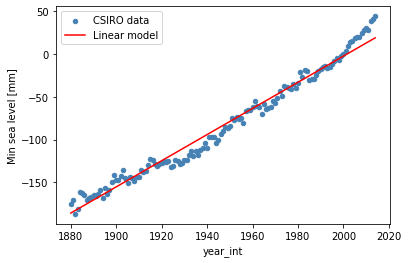

In [ ]:
ax = csiro.plot("year_int", "adjusted_min_level", kind="scatter",
                xlabel="Year",
                ylabel="Min sea level [mm]",
                color="steelblue", label="CSIRO data", s=20)
ax = csiro.plot("year_int", "model_unst", label="Linear model", color="red", ax=ax)

In [ ]:
#Predicting for 2100 CSIRO

csiro_unst_2100= (2100 - csiro["year_int"].mean()) / csiro["year_int"].std() #standardize
hgt = csiro_unst_2100.reshape(-1, 1)
x=csiro_lm.predict(hgt)
x * csiro["adjusted_min_level"].std() + csiro["adjusted_min_level"].mean()


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([150.66106376])

In [ ]:
#Predicting for 2100 NOAA

noaa_unst_2100= (2100 - noaa["year"].mean()) / noaa["year"].std()
fgt = noaa_unst_2100.reshape(-1, 1)
y=noaa_lm.predict(fgt)
y * noaa["max_level"].std() + noaa["max_level"].mean()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([305.01620158])

In [ ]:
noaa_lm.intercept_

array([-0.00073066])

In [ ]:
csiro_lm.intercept_

array([-0.00016263])

<b>Comment on the above plots by answering the following questions:  Which data is better fit by a linear model?  Why do you think that is?  What are the rates of sea level rise for each model?  What are the predictions for each model for sea level in 2100?  What approximations have we made that may or may not be accurate?</b>

The R2 of both the plots are almost similar. R2=0.98 for CSIRO and 0.96 for NOAA but the MSE for NOAA is lesser (21.89) than that of CSIRO (83.07). Hence NOAA is better fit by a linear model than CSIRO. Based on above calculations the sea level prediction in 2100 by NOAA data is 305.53 mm and by CSIRO data is 149.84. The intercept for NOAA is -0.0009 and rate of sea level rise for CSIRO data is 0.0004. The CSIRO data has been approximated such that the relative sea level at 2000 is considered as 0 mm.

### **PART 6 - EXTRA CREDIT**

<b>Perform a linear regression on each 30 year interval in the CSIRO data starting from 1880 (i.e, 1880-1910, 1881-1911, 1882-1912, etc).  Make a plot of the slope that is fit for each interval as a function of time.  What are the implications of this plot?</b>


In [ ]:
x= csiro[(csiro["year_int"] >= 1880) & (csiro["year_int"]<=1910)]

<AxesSubplot:xlabel='Year', ylabel='Adjusted minimum level[mm]'>

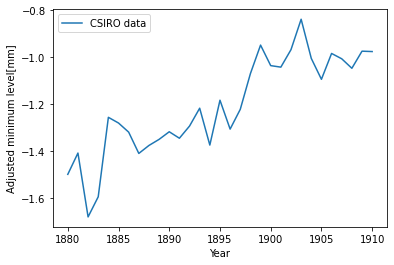

In [ ]:
x.plot("year_int", "adjusted_min_level_st",xlabel="Year",ylabel="Adjusted minimum level[mm]",label="CSIRO data")

In [ ]:
x.head(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level,year_int,year_int_st,adjusted_min_level_st,model_st,model_unst
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000,-175.782783,1880,-1.712888,-1.499067,-1.662059,-185.833393
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472,-170.182783,1881,-1.687323,-1.408251,-1.637255,-184.303873
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945,-186.982783,1882,-1.661757,-1.680699,-1.612450,-182.774353
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.682783,1883,-1.636192,-1.594748,-1.587646,-181.244832
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,0.590551,-160.782783,1884,-1.610626,-1.255810,-1.562842,-179.715312


The minimum sea levels are increasing over time. Idea is to create a for loop with x=1880 and y=1910 and keep incrementing by 1. Rough work done below

In [ ]:
x=np.arange(1880,1979,1)
y=np.arange(1910,2009,1)

In [ ]:
x=x.astype(int)
y=y.astype(int)

In [ ]:
#df=pd.DataFrame()
#df=pd.concat([x,y]) # - throws error

In [ ]:
#for index, row in df.iterrows():
    #m=row[x], n=row[y]
    #print(m,n)